In [57]:
## Initial Exploration of the 311 data
#####################################################################
# This file explores the Analyze Boston 311 data
# to import the data we must first run the import-311-data.py file
# this file also loads pandas
#####################################################################
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import numpy as np



%run -t import-311-data.py

/Users/jacobpstein/Documents/Georgetown SCS/capstone/boston-crime/02 code/import-311-data.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(url) for url in urls]


KeyboardInterrupt: 


IPython CPU timings (estimated):
  User   :       9.96 s.
  System :       4.07 s.
Wall time:      89.96 s.


In [49]:
# let's see how many rows and columns we have
df_311.shape

(2408011, 33)

In [50]:
# total unique observations per column
df_311.nunique()

case_enquiry_id                   2408011
open_dt                           2191239
target_dt                         1264612
closed_dt                         2140771
ontime                                  2
case_status                             2
closure_reason                    1777824
case_title                          23043
subject                                14
reason                                 54
type                                  210
queue                                 193
department                             18
submittedphoto                     701342
closedphoto                        354100
location                           146375
fire_district                          12
pwd_district                           22
city_council_district                  11
police_district                        24
neighborhood                           24
neighborhood_services_district         17
ward                                   56
precinct                          

<AxesSubplot:xlabel='date'>

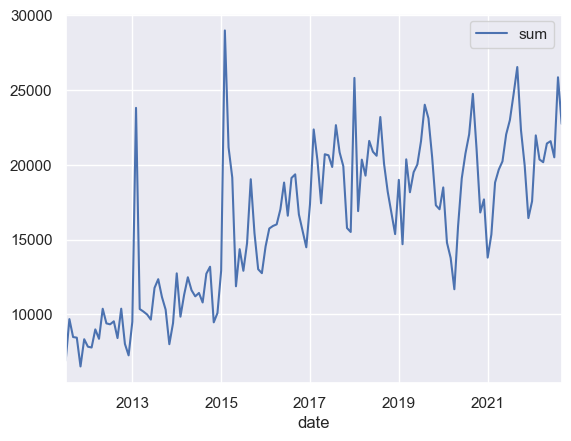

In [53]:
# get the total number of closed calls by month
closed_calls = df_311.groupby(['close_date']).agg({'closed': ['sum']}).reset_index()

# rename the columns
closed_calls.columns = ['date', 'sum']

# set date as the row index
closed_calls = closed_calls.set_index("date")

# take a look
closed_calls.plot()

In [54]:
# it looks like there is some clear seasonality in our data

df_311['close_month'] = df_311['closed_dt'].dt.month
close_month = df_311.groupby(['close_month']).agg({'closed': ['sum']}).reset_index()
close_month.columns = ['month', 'sum']

close_month.sort_values('sum', ascending=False)

,month,sum
7,8.0,218710
8,9.0,217197
6,7.0,195245
1,2.0,192216
5,6.0,187646
2,3.0,181712
4,5.0,180220
9,10.0,176429
3,4.0,172590
0,1.0,169557


In [55]:
# let's take a look at the average gap between opening and closing calls

df_311['open_to_close'] = df_311['closed_dt'] - df_311['open_dt']

# convert to days
df_311['open_to_close'] = df_311['open_to_close'].apply(lambda x: x.days)


# average number of days overall
df_311['open_to_close'].describe()


count    2.183138e+06
mean     1.687225e+01
std      7.667902e+01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      2.912000e+03
Name: open_to_close, dtype: float64

In [56]:
# average number of days to close calls by year
df_311.groupby(['close_year'])['open_to_close'].agg('mean')


close_year
2011.0     6.891735
2012.0    14.693035
2013.0    24.652617
2014.0    32.740477
2015.0    24.209018
2016.0    18.506852
2017.0    17.834176
2018.0    17.757748
2019.0    25.347769
2020.0     7.518795
2021.0     6.321454
2022.0     5.794183
Name: open_to_close, dtype: float64

<AxesSubplot:xlabel='close_year', ylabel='open_to_close'>

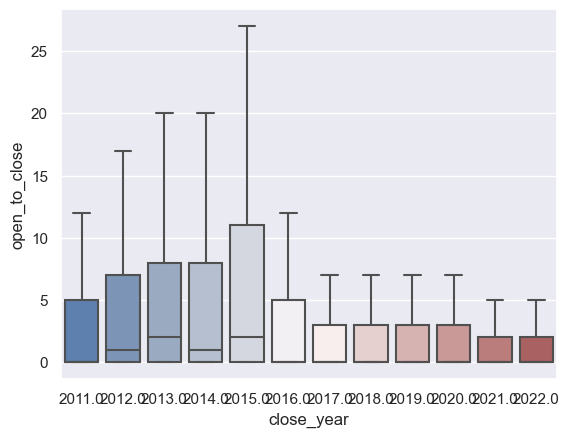

In [68]:
sns.set_theme(style="darkgrid")

# let's take a look at the time between open and close without outliers

sns.boxplot(data = df_311, y='open_to_close', x='close_year', showfliers = False, palette="vlag")